### Audio is a fun source of data for practicing signal processing.

### Example of how to play a sound from a vector you generated in Python:

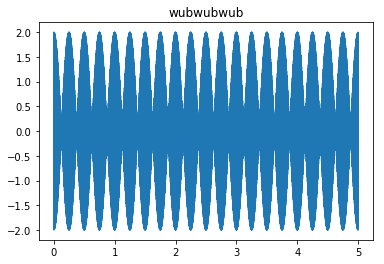

In [1]:
#Example from https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
import numpy as np
framerate =44100
t=np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t)+np.sin(2*np.pi*224*t)
#                                    
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(t,data)
plt.title ('wubwubwub')
plt.show()



In [2]:
from IPython.display import Audio, display
#from ipywidgets import Audio
Audio(data,rate=framerate) #Show a slider to play the sound

### More interesting example where you make a keyboard playable from your notebook
https://ipython-books.github.io/117-creating-a-sound-synthesizer-in-the-notebook

In [3]:
from IPython.display import clear_output #Need a few more things
#from ipywidgets import widgets 
from functools import partial

In [4]:
#Define sampling rate and note duration
KeyboardRate = 16000.
duration = .25
t = np.linspace(
    0., duration, int(KeyboardRate * duration))

In [5]:
#Define a function that will make a sine wave of a given frequency f
def synth(f):
    x = np.sin(f * 2. * np.pi * t)
    display(Audio(x, rate=KeyboardRate, autoplay=True))

In [6]:
synth(440) #Try it out

In [7]:
#Define some frequencies
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 440. * 2**(np.arange(3, 3 + len(notes)) / 12.)
notes = list(zip(notes, freqs))

In [8]:
from ipywidgets import widgets

ModuleNotFoundError: No module named 'ipywidgets'

In [9]:
#Create a piano
layout = widgets.Layout(
    width='30px', height='60px',
    border='1px solid black')

buttons = []
for note, f in notes:
    button = widgets.Button(
        description=note, layout=layout)

    def on_button_clicked(f, b):
        # When a button is clicked, we play the sound
        # in a dedicated Output widget.
        with widgets.Output():
            synth(f)

    button.on_click(partial(on_button_clicked, f))
    buttons.append(button)

# We place all buttons horizontally.
widgets.Box(children=buttons)


NameError: name 'widgets' is not defined

### Add some code that will let us use the microphone

In [10]:
from ipywebrtc import AudioRecorder,CameraStream
#Works fine on my mac...when I use a newer Jupyter notebook that breaks my python2 research code. Nope nope nope
#I'll demo this section on Windows
#If you get an ImportError on your installation, go to Anaconda Prompt (from Windows Menu in Anaconda folder)
#At the prompt, type: conda install -c conda-forge ipywebrtc
#This will download and install the ipywebrtc code that communicates between ipython "widgets" in the notebook,
#and your computer.

ModuleNotFoundError: No module named 'ipywebrtc'

In [11]:
#We are going to use a CameraStream to get audio from the built-in mic
cstream = CameraStream(constraints=
                      {'facing_mode': 'user',
                       'audio': True,
                       'video': False #{ 'width': 640, 'height': 480 } #make True to check video
                       })


NameError: name 'CameraStream' is not defined

In [12]:
cstream  #Run this cell to test your camera/mic access. 
#If you are getting nothing, go to Windows Settings and enable camera and microphone access.
#Your browser can be set up to still ask for access permission case-by-case
#I made 'video' False above, so if you didn't change it, you should only get audio.

NameError: name 'cstream' is not defined

In [13]:
audio_recorder = AudioRecorder(filename='sample.wav',stream=cstream)
audio_recorder #This should show a record button, download button and playback slider


NameError: name 'AudioRecorder' is not defined

You can also bring in sounds from files
as vectors to process using Numpy or more specialized signal processing and even voice recognition tools.
These sounds could be ones you recorded using the AudioRecorder above, or other available files.
To use other sound files, you can use a URL or download them to your computer.

In [14]:
#help(Audio)
from scipy.io.wavfile import read
rate,song = read("CantinaBand3.wav")  #You can replace with "sample.wav" if you recorded and saved a sound sample
x=np.array(song,dtype=float)
rate,len(x)
Audio(song,rate=rate)


Text(0, 0.5, 'Amplitude')

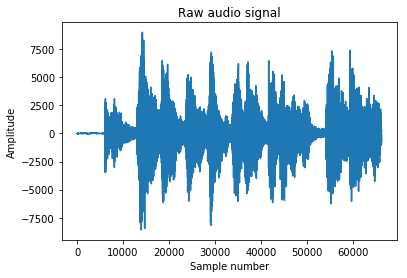

In [15]:
#Spectrogram of the sample.wav signal - This spectrogram shows the frequency spectrum on y-axis vs time on x-axis
#It is available as specgram from matplotlib
plt.plot(x)
plt.title('Raw audio signal')   
plt.xlabel('Sample number')
plt.ylabel('Amplitude')


Text(0, 0.5, 'Frequency(Hz)')

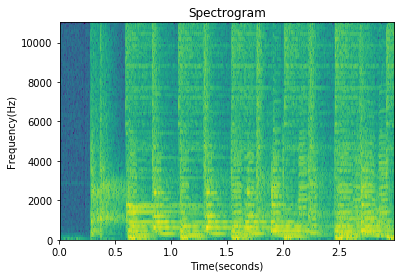

In [16]:
plt.specgram(x,Fs=rate)
plt.title('Spectrogram')
plt.xlabel('Time(seconds)')
plt.ylabel('Frequency(Hz)')

Advanced: do real-time processing on the incoming audio stream (Voice changer etc) http://conference.scipy.org/proceedings/scipy2018/pdfs/mark_wickert_250.pdf